# **HEART DISEASE ANALYSIS** 

---
## **1. Importing Packages and Dataset**

In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#EDA
from collections import Counter
import pandas_profiling as pp

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_log_error

#ensembling
from mlxtend.classifier import StackingCVClassifier

#time
import time

In [2]:
data = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---
## **2. Exploratory Data Analysis**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### **Missing Value Detection**

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Descriptive statistics**

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
profile=pp.ProfileReport(data)
profile.to_file("edaOutput.html")

---
## **3. Model prepration**

### **Scaling the data**

In [7]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


### **Check if data is symmetric to avoid data imbalancing issue**

In [8]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

### **ML Models Analysed:**

> ####  1. Logistic Regression
> #### 2. Naive Bayes
> #### 3. Random Forest Classifier
> #### 4. Extreme Gradient Boost
> #### 5. K-Nearest Neighbour
> #### 6. Decision Tree
> #### 7. Support Vector Machine


### **I) LOGISTIC REGRESSION**

In [9]:
stime = time.time()

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

etime = time.time()
print("Training Time: ", (etime-stime)*1000)
print()

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

stime = time.time()
input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))
print("For input: ", values)
print("Predicted output: ", lr.predict(input_series))
etime = time.time()
print("Prediction Time: ", (etime-stime)*1000)



Training Time:  9.980440139770508

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

For input:  [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
Predicted output:  [1]
Prediction Time:  1.766204833984375


### **II) NAIVE BAYES**

In [10]:
stime = time.time()

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)

etime = time.time()
print("Training Time: ", (etime-stime)*1000)
print()

nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

stime = time.time()
input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))
print("For input: ", values)
print("Predicted: ", nb.predict(input_series))
etime = time.time()
print("Prediction Time: ", (etime-stime)*1000)

Training Time:  2.6755332946777344

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

For input:  [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
Predicted:  [1]
Prediction Time:  2.0873546600341797


### **III) RANDOM FOREST**

In [11]:
stime = time.time()

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

etime = time.time()
print("Training Time: ", (etime-stime)*1000)
print()

rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

stime = time.time()
input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))
print("For input: ", values)
print("Predicted: ", rf.predict(input_series))
etime = time.time()
print("Prediction Time: ", (etime-stime)*1000)

Training Time:  45.09878158569336

confussion matrix
[[22  5]
 [ 4 30]]


Accuracy of Random Forest: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

For input:  [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
Predicted:  [1]
Prediction Time:  5.057811737060547


### Code to find optimal random state value
### Best performance at n_estimators=20

In [12]:
"""#Check optimal random state
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")"""

'#Check optimal random state\nfrom sklearn.ensemble import RandomForestClassifier\n\nmax_accuracy = 0\n\n\nfor x in range(2000):\n    rf = RandomForestClassifier(random_state=x)\n    rf.fit(X_train,y_train)\n    Y_pred_rf = rf.predict(X_test)\n    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)\n    if(current_accuracy>max_accuracy):\n        max_accuracy = current_accuracy\n        best_x = x\n        \nprint(max_accuracy)\nprint(best_x)\n\nrf = RandomForestClassifier(random_state=best_x)\nrf.fit(X_train,y_train)\nY_pred_rf = rf.predict(X_test)\nY_pred_rf.shape\n\nscore_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)\n\nprint("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")'

### **IV) EXTREME GRADIENT BOOST**

In [13]:
stime = time.time()

m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)

etime = time.time()
print("Training Time: ", (etime-stime)*1000)
print()

xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

stime = time.time()
input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))
print("For input: ", values)
print("Predicted: ", xgb.predict(input_series))
etime = time.time()
print("Prediction Time: ", (etime-stime)*1000)

Training Time:  29.536962509155273

confussion matrix
[[24  3]
 [ 3 31]]


Accuracy of Extreme Gradient Boost: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

For input:  [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
Predicted:  [1]
Prediction Time:  2.5315284729003906


### **V) K NEAREST NEIGHBOR**

In [14]:
stime = time.time()

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

etime = time.time()
print("Training Time: ", (etime-stime)*1000)
print()

knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

stime = time.time()
input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))
print("For input: ", values)
print("Predicted: ", knn.predict(input_series))
etime = time.time()
print("Prediction Time: ", (etime-stime)*1000)

Training Time:  8.201122283935547

confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

For input:  [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
Predicted:  [1]
Prediction Time:  4.393815994262695


### **VI) DECISION TREE**

In [15]:
stime = time.time()

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)

etime = time.time()
print("Training Time: ", (etime-stime)*1000)
print()

dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

stime = time.time()
input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))
print("For input: ", values)
print("Predicted: ", dt.predict(input_series))
etime = time.time()
print("Prediction Time: ", (etime-stime)*1000)

Training Time:  2.771139144897461

confussion matrix
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

For input:  [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
Predicted:  [1]
Prediction Time:  2.2957324981689453


### **VII) SUPPORT VECTOR MACHINE**

In [16]:
stime = time.time()

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)

etime = time.time()
print("Training Time: ", (etime-stime)*1000)
print()

svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

stime = time.time()
input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))
print("For input: ", values)
print("Predicted: ", svc.predict(input_series))
etime = time.time()
print("Prediction Time: ", (etime-stime)*1000)

Training Time:  4.766702651977539

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

For input:  [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
Predicted:  [1]
Prediction Time:  1.70135498046875


---
## 4) **Model Evaluation**

### **ROC**

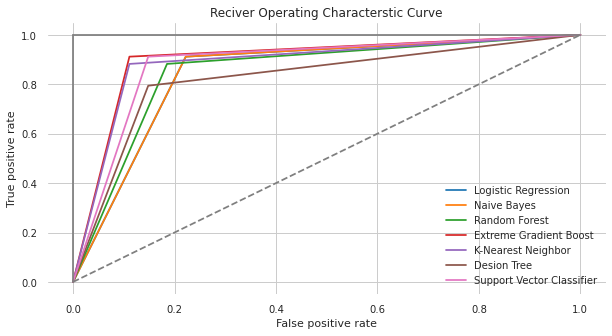

In [18]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### **Accuracy**

In [19]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,85.245902
3,Extreme Gradient Boost,90.163934
4,K-Nearest Neighbour,88.524590
5,Decision Tree,81.967213
6,Support Vector Machine,88.524590


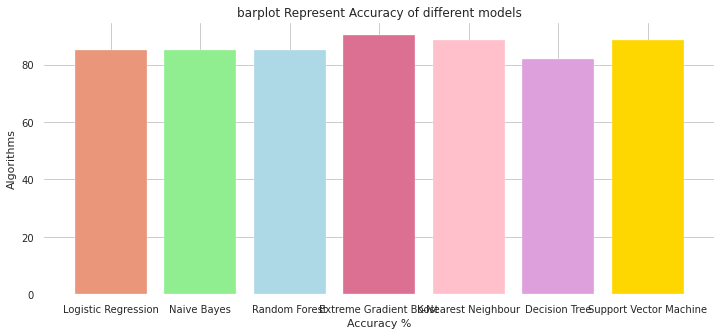

In [20]:
colors = ['darksalmon','lightgreen','lightblue','palevioletred','pink','plum','gold',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

---
## **5) Optimised Ensemble Model**


### **Stacking** 

> #### The best performing models, XGB, KNN and SVM are used

In [21]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[24  3]
 [ 2 32]]


Accuracy of StackingCVClassifier: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### **Voting**
> #### XGB is selected because it has best accuracy
> #### KNN and SVM have second best accuracy. KNN is selected over SVM because KNN and XGB are both non-linear.
> #### Plurality Voting is implemented.

In [22]:
stime = time.time()

#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

#Defining 5 K-NN classifiers
model1 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
estimators.append(('knn1', model1))
model2 = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
estimators.append(('knn2', model2))
model3 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
estimators.append(('knn3', model3))
model4 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
estimators.append(('knn4', model4))
model5 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
estimators.append(('knn5', model5))


#Defining XGB classifiers
model6 = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
estimators.append(('xgb1', model6))
model7 = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
estimators.append(('xgb2', model7))
model8 = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
estimators.append(('xgb3', model8))
model9 = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
estimators.append(('xgb4', model9))
model10 = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
estimators.append(('xgb5', model10))

# Defining the ensemble model
from sklearn.ensemble import VotingClassifier

#estimators=[['xgb', xgb_clf],['knn', knn_clf],['svm', svm_clf], ['lr', lr_clf], ['rf', rf_clf], ['tree', tree_clf], ['nb',GaussianNB()]]
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

etime = time.time()
print("Time: ", (etime-stime)*1000)

#Confusion matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
acc_score_HybridEnsembler = accuracy_score(y_test, y_pred)

print("confussion matrix")
print(cm_HybridEnsembler)
print("\n")

print("Accuracy of Voting Classifier:",acc_score_HybridEnsembler*100,'\n')
print(classification_report(y_test,y_pred))

values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

stime = time.time()
input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))
print("Predicted: ", ensemble.predict(input_series))
etime = time.time()
print("OE Time: ", (etime-stime)*1000)

Time:  104.52389717102051
confussion matrix
[[26  1]
 [ 3 31]]


Accuracy of Voting Classifier: 93.44262295081968 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

Predicted:  [1]
OE Time:  7.796525955200195


### **Cross validation**

In [23]:
"""
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

cv = KFold(n_splits=10, random_state=1, shuffle=True)
#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#Performance
print("MAE:{}".format(mean(absolute(scores))))
print("RMSE:{}".format(sqrt(mean(absolute(scores)))))
"""

'\n#Cross validation\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\nfrom numpy import mean\nfrom numpy import absolute\nfrom numpy import sqrt\n\ncv = KFold(n_splits=10, random_state=1, shuffle=True)\n#use k-fold CV to evaluate model\nscores = cross_val_score(model, X_train, y_train, scoring=\'neg_mean_absolute_error\',\n                         cv=cv, n_jobs=-1)\n\n#Performance\nprint("MAE:{}".format(mean(absolute(scores))))\nprint("RMSE:{}".format(sqrt(mean(absolute(scores)))))\n'

### **ROC**

AUROCC for the optimized ensemble: 0.937



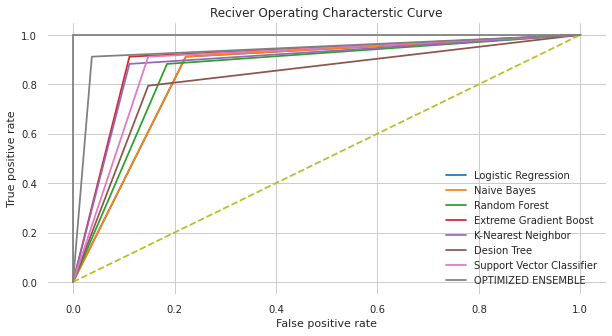

In [24]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
oe_false_positive_rate,oe_true_positive_rate,oe_threshold = roc_curve(y_test,y_pred)

aurocValues = []
for i in range(3):
    lr={
        'model': 'LR',
        'FPRate': lr_false_positive_rate.tolist()[i],
        'TPRate': lr_true_positive_rate.tolist()[i],
    }
    nb={
        'model': 'NB',
        'FPRate': nb_false_positive_rate.tolist()[i],
        'TPRate': nb_true_positive_rate.tolist()[i],
    }
    rf={
        'model': 'RF',
        'FPRate': rf_false_positive_rate.tolist()[i],
        'TPRate': rf_true_positive_rate.tolist()[i],
    }
    xgb={
        'model': 'XGB',
        'FPRate': xgb_false_positive_rate.tolist()[i],
        'TPRate': xgb_true_positive_rate.tolist()[i],
    }
    knn={
        'model': 'KNN',
        'FPRate': knn_false_positive_rate.tolist()[i],
        'TPRate': knn_true_positive_rate.tolist()[i],
    }
    dt={
        'model': 'DT',
        'FPRate': dt_false_positive_rate.tolist()[i],
        'TPRate': dt_true_positive_rate.tolist()[i],
    }
    svm={
        'model': 'SVM',
        'FPRate': svc_false_positive_rate.tolist()[i],
        'TPRate': svc_true_positive_rate.tolist()[i],
    }
    oe={
        'model': 'OE',
        'FPRate': oe_false_positive_rate.tolist()[i],
        'TPRate': oe_true_positive_rate.tolist()[i],
    }
    
    aurocValues.append(lr)
    aurocValues.append(nb)
    aurocValues.append(rf)
    aurocValues.append(xgb)
    aurocValues.append(knn)
    aurocValues.append(dt)
    aurocValues.append(svm)
    aurocValues.append(oe)
    
#print(aurocValues)

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUROCC for the optimized ensemble: %.3f' % auc)
print()

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(oe_false_positive_rate,oe_true_positive_rate,label='OPTIMIZED ENSEMBLE')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

---
## **6) Prediction**

In [25]:
values= [58.0, 0.0, 0.0, 100.0, 248.0, 0.0, 0.0, 122.0, 0.0, 1.0, 1.0, 0.0, 2.0]
indexes=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

input_series=pd.Series(values, index=indexes)
input_series = scaler.transform(input_series.values.reshape(1,-1))

print("Predicted: ", ensemble.predict(input_series))


Predicted:  [1]


### **Saving Model**

In [26]:
import joblib
joblib.dump(ensemble, 'model.pkl')

['model.pkl']

### **Saving Model**

In [27]:
loaded=joblib.load('./model.pkl')
print("Predicted: ", loaded.predict(input_series))

Predicted:  [1]


---
## **7. Feature Selection**

### **XGB Feature Selection**

In [28]:
#XGB feature selection
from sklearn.feature_selection import SelectFromModel

model = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
model.fit(X_train, y_train)
xgb_predicted = model.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

thresholds = model.feature_importances_
thresholds.sort()
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

confussion matrix
[[24  3]
 [ 3 31]]


Accuracy of Extreme Gradient Boost: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Thresh=0.012, n=13, Accuracy: 90.16%
Thresh=0.022, n=12, Accuracy: 83.61%
Thresh=0.024, n=11, Accuracy: 85.25%
Thresh=0.033, n=10, Accuracy: 86.89%
Thresh=0.058, n=9, Accuracy: 85.25%
Thresh=0.069, n=8, Accuracy: 81.97%
Thresh=0.077, n=7, Accuracy: 83.61%
Thresh=0.094, n=6, Accuracy: 86.89%
Thresh=0.097, n=5, Accuracy: 83.61%
Thresh=0.103, n=4, Accuracy: 86.89%
Thresh=0.105, n=3, Accuracy: 78.69%
Thresh=0.147, n=2, Accuracy: 72.13%
Thresh=0.160, n=1, Accuracy: 72.13%


### **ExtraTreesClassifier Feature Selection**

In [29]:
#ExtraTreesClassifier Feature Selection
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

print(model.feature_importances_)

[0.07031533 0.07190322 0.12710869 0.05865035 0.06279138 0.0184254
 0.03144632 0.08641119 0.09219433 0.0813174  0.06237106 0.1427006
 0.09436474]


### **Chisquare Feature Selection**

In [30]:
#Chisquare Feature Selection
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

data = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
y = data["target"]
X = data.drop('target',axis=1)

test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, y)

# summarize scores
set_printoptions(precision=4)
print("Scores: ",fit.scores_)
features = fit.transform(X)
print()

# summarize selected features
print("SELECTED FEATURES: \n",features[0:5,])
print()

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print ("NUMBER OF FEATURES: ", X_train.shape[1])
print()

##################################
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

Scores:  [ 23.2866   7.5768  62.5981  14.8239  23.9364   0.2029   2.9783 188.3205
  38.9144  72.6443   9.8041  66.4408   5.7919]

SELECTED FEATURES: 
 [[  3.  233.  150.    0.    2.3   0. ]
 [  2.  250.  187.    0.    3.5   0. ]
 [  1.  204.  172.    0.    1.4   0. ]
 [  1.  236.  178.    0.    0.8   0. ]
 [  0.  354.  163.    1.    0.6   0. ]]

NUMBER OF FEATURES:  6

confussion matrix
[[20  7]
 [ 5 29]]


Accuracy of Logistic Regression: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

confussion matrix
[[20  7]
 [ 5 29]]


Accuracy of Naive Bayes model: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
          

### **RFE**

In [31]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 11)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print()

df=pd.DataFrame()
for i in range(len(fit.ranking_)):
    if fit.ranking_[i] == 1:
        df[X.columns.values[i]]=data[X.columns.values[i]]
        
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##################################
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

Num Features: 11
Selected Features: [False  True  True  True False  True  True  True  True  True  True  True
  True]
Feature Ranking: [2 1 1 1 3 1 1 1 1 1 1 1 1]

confussion matrix
[[21  6]
 [ 4 30]]


Accuracy of Logistic Regression: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

confussion matrix
[[22  5]
 [ 3 31]]


Accuracy of Naive Bayes model: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

c

### **PCA**

In [32]:
#PCA

from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=9)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

features = fit.transform(X)

# summarize selected features
print(features[0:5,])

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##################################
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

print (X_train.shape[1])

Explained Variance: [7.4756e-01 1.5037e-01 8.4597e-02 1.6216e-02 3.8409e-04 2.8123e-04
 2.2899e-04 9.9833e-05 7.7214e-05]
[[ 3.9461e-02 -1.7828e-03 -1.5372e-03  4.7588e-02  9.9805e-01  1.1639e-04
  -1.5524e-03 -7.3584e-03  6.3148e-04  1.3299e-03 -9.9986e-05  1.4677e-03
   1.1822e-03]
 [ 1.8219e-01  7.9373e-04 -1.2542e-02  1.0381e-01 -1.9425e-02  4.6197e-04
  -1.2021e-03 -9.7719e-01  7.5482e-03  1.7941e-02 -1.0427e-02  1.0110e-02
   2.5924e-03]
 [ 1.2550e-01 -1.0652e-03  6.1632e-03  9.8228e-01 -5.0865e-02  3.6651e-03
  -2.7096e-03  1.2893e-01 -2.8534e-05  9.2143e-03 -2.3021e-03  4.1973e-03
   1.2174e-03]
 [ 9.7405e-01 -4.6345e-03  9.2624e-03 -1.4803e-01 -3.0251e-02  3.4344e-03
  -2.9585e-03  1.6648e-01 -7.0240e-03 -8.0349e-04  3.2229e-03  2.2350e-02
  -8.6677e-04]
 [-9.4272e-03  7.8311e-02 -3.3365e-01 -9.7897e-03 -1.3441e-03 -1.4645e-03
  -2.6307e-02  2.4082e-02  1.1191e-01  7.8276e-01 -2.3163e-01  4.1908e-01
   1.6300e-01]
 [ 3.5740e-03 -2.8163e-02  7.0083e-01 -7.5795e-03  1.3280e-03 -

### **Defining Hybrid Ensemble Learning Model after Feature Extraction**

In [33]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []


#Defining 5 Support Vector Classifiers
model21 = SVC(kernel = 'linear')
estimators.append(('svm1', model21))
model22 = SVC(kernel = 'poly')
estimators.append(('svm2', model22))
model23 = SVC(kernel = 'rbf')
estimators.append(('svm3', model23))
model24 = SVC(kernel = 'rbf')
estimators.append(('svm4', model24))
model25 = SVC(kernel = 'linear')
estimators.append(('svm5', model25))


#Defining 5 K-NN classifiers
model1 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
estimators.append(('knn1', model1))
model2 = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
estimators.append(('knn2', model2))
model3 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
estimators.append(('knn3', model3))
model4 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
estimators.append(('knn4', model4))
model5 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
estimators.append(('knn5', model5))

# Defining the ensemble model
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

#Confusion matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
acc_score_HybridEnsembler = accuracy_score(y_test, y_pred)

print("confussion matrix")
print(cm_HybridEnsembler)
print("\n")

print("Accuracy of Voting Classifier:",acc_score_HybridEnsembler*100,'\n')
print(classification_report(y_test,y_pred))


confussion matrix
[[19  8]
 [ 2 32]]


Accuracy of Voting Classifier: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.80      0.94      0.86        34

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61

